Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

Loading the CSV file into data frame using pandas library

In [ ]:
glucose_data = pd.read_csv("/content/GLUCOSE(SUGAR).csv")
glucose_data

,Age,Sex,Blood Sugar Fasting,Sugar levels Ref,Blood Sugar Post Lunch,Target
0,58,F,111,120,152,0
1,66,M,92,120,253,0
2,30,F,175,120,191,1
3,40,F,186,120,201,1
4,49,M,142,120,213,1
...,...,...,...,...,...,...
96,65,M,134,120,173,1
97,68,M,102,120,136,0
98,70,F,168,120,390,1
99,65,F,218,120,270,1


In [ ]:
print(glucose_data.columns)

Index(['Age', 'Sex', 'Blood Sugar Fasting', 'Sugar levels Ref',
       'Blood Sugar Post Lunch', 'Target'],
      dtype='object')


In [ ]:
glucose_data['Sex'].replace('F', 0, inplace = True)
glucose_data['Sex'].replace('M', 1, inplace = True)
glucose_data

,Age,Sex,Blood Sugar Fasting,Sugar levels Ref,Blood Sugar Post Lunch,Target
0,58,0,111,120,152,0
1,66,1,92,120,253,0
2,30,0,175,120,191,1
3,40,0,186,120,201,1
4,49,1,142,120,213,1
...,...,...,...,...,...,...
96,65,1,134,120,173,1
97,68,1,102,120,136,0
98,70,0,168,120,390,1
99,65,0,218,120,270,1


Understanding the data

In [ ]:
# number of rows and columns
glucose_data.shape

(101, 6)

In [ ]:
# first 10 rows
glucose_data.head(10)

,Age,Sex,Blood Sugar Fasting,Sugar levels Ref,Blood Sugar Post Lunch,Target
0,58,0,111,120,152,0
1,66,1,92,120,253,0
2,30,0,175,120,191,1
3,40,0,186,120,201,1
4,49,1,142,120,213,1
5,29,0,86,120,107,0
6,70,0,148,120,246,1
7,72,0,122,120,162,1
8,31,1,60,120,100,0
9,57,0,113,120,74,0


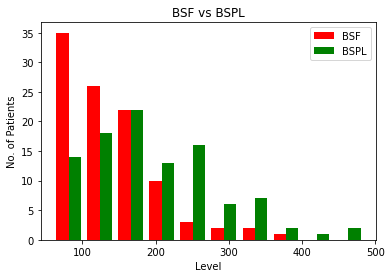

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
h1 = glucose_data['Blood Sugar Fasting']
h2 = glucose_data['Blood Sugar Post Lunch']
legend = ['BSF', 'BSPL']
plt.hist([h1,h2], color = ['red','green'])
plt.xlabel('Level')
plt.ylabel('No. of Patients')
plt.legend(legend)
plt.title('BSF vs BSPL')
plt.show()

In [ ]:
# statistical measures of the data
glucose_data.describe()

,Age,Sex,Blood Sugar Fasting,Sugar levels Ref,Blood Sugar Post Lunch,Target
count,101.000000,101.000000,101.000000,101.0,101.000000,101.000000
mean,50.851485,0.504950,139.712871,120.0,198.178218,0.495050
std,14.148771,0.502469,61.054785,0.0,90.133501,0.502469
min,19.000000,0.000000,60.000000,120.0,65.000000,0.000000
25%,37.000000,0.000000,93.000000,120.0,119.000000,0.000000
50%,53.000000,1.000000,119.000000,120.0,173.000000,0.000000
75%,65.000000,1.000000,170.000000,120.0,256.000000,1.000000
max,77.000000,1.000000,366.000000,120.0,484.000000,1.000000


Negative(0):  51
Positive(1):  50


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


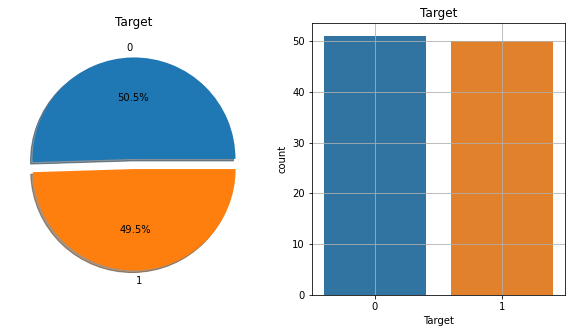

In [ ]:
f, ax = plt.subplots(1,2,figsize = (10,5))
glucose_data['Target'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot('Target', data = glucose_data, ax = ax[1])
ax[1].set_title('Target')
N, P = glucose_data['Target'].value_counts()
print('Negative(0): ', N)
print('Positive(1): ', P)
plt.grid()
plt.show()

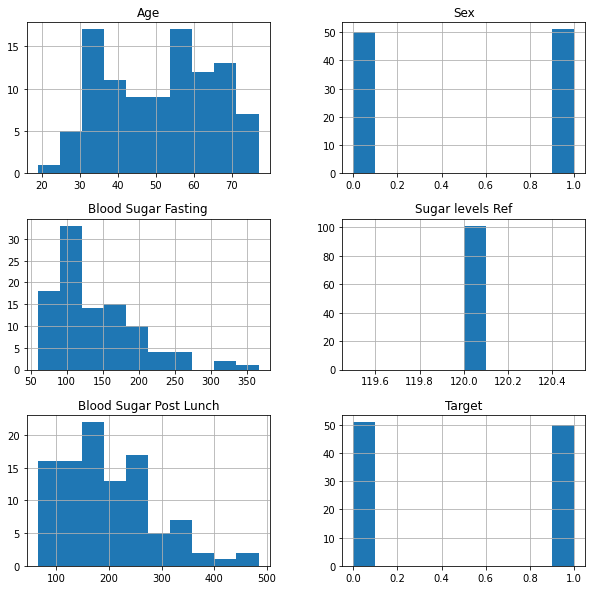

In [ ]:
glucose_data.hist(bins = 10, figsize = (10,10))
plt.show()

In [ ]:
correlation = glucose_data.corr()

In [ ]:
correlation

,Age,Sex,Blood Sugar Fasting,Sugar levels Ref,Blood Sugar Post Lunch,Target
Age,1.000000,0.057072,-0.068603,NaN,0.050363,0.034357
Sex,0.057072,1.000000,-0.089105,NaN,-0.037556,-0.049412
Blood Sugar Fasting,-0.068603,-0.089105,1.000000,NaN,0.807744,0.757333
Sugar levels Ref,NaN,NaN,NaN,NaN,NaN,NaN
Blood Sugar Post Lunch,0.050363,-0.037556,0.807744,NaN,1.000000,0.694003
Target,0.034357,-0.049412,0.757333,NaN,0.694003,1.000000


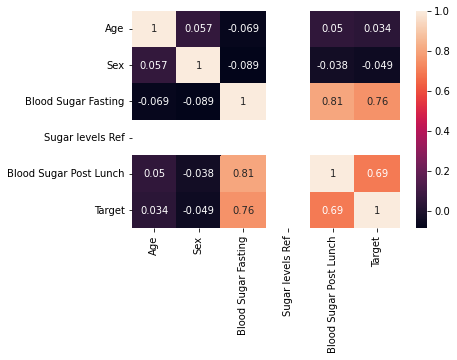

In [ ]:
sns.heatmap(correlation, annot = True)

Splitting the Target and other columns

In [ ]:
x = glucose_data.drop(columns = 'Target', axis = 1)
y = glucose_data['Target']

In [ ]:
print(x)

     Age  Sex  Blood Sugar Fasting  Sugar levels Ref  Blood Sugar Post Lunch
0     58    0                  111               120                     152
1     66    1                   92               120                     253
2     30    0                  175               120                     191
3     40    0                  186               120                     201
4     49    1                  142               120                     213
..   ...  ...                  ...               ...                     ...
96    65    1                  134               120                     173
97    68    1                  102               120                     136
98    70    0                  168               120                     390
99    65    0                  218               120                     270
100   72    1                   65               120                     162

[101 rows x 5 columns]


In [ ]:
print(y)

0      0
1      0
2      1
3      1
4      1
      ..
96     1
97     0
98     1
99     1
100    0
Name: Target, Length: 101, dtype: int64


Splitting the data into training data and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(101, 5) (80, 5) (21, 5)


In [ ]:
print(x_train)

    Age  Sex  Blood Sugar Fasting  Sugar levels Ref  Blood Sugar Post Lunch
62   36    1                  123               120                     250
3    40    0                  186               120                     201
71   57    1                  119               120                     166
45   53    1                   82               120                     118
48   35    0                  153               120                     348
..  ...  ...                  ...               ...                     ...
97   68    1                  102               120                     136
67   46    1                  131               120                     237
64   48    0                  152               120                     130
47   36    1                  256               120                     268
44   30    0                  102               120                      94

[80 rows x 5 columns]


In [ ]:
print(x_test)

    Age  Sex  Blood Sugar Fasting  Sugar levels Ref  Blood Sugar Post Lunch
26   19    0                  112               120                     168
86   39    1                   75               120                     108
2    30    0                  175               120                     191
55   53    1                  124               120                     217
75   31    1                  199               120                     356
94   33    1                  108               120                     138
16   65    0                  151               120                     263
73   57    0                  108               120                     162
54   63    0                  180               120                     242
96   65    1                  134               120                     173
53   55    0                   92               120                     165
93   30    1                  124               120                     272
78   68    1

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-1.12805611  0.97530483 -0.29484257  0.          0.52663889]
 [-0.83694486 -1.02532046  0.67135154  0.          0.00988684]
 [ 0.40027798  0.97530483 -0.35618822  0.         -0.35922177]
 [ 0.10916672  0.97530483 -0.92363555  0.         -0.86542787]
 [-1.20083393 -1.02532046  0.16524986  0.          1.56014301]
 [ 1.34638955 -1.02532046  0.08856779  0.          0.48445505]
 [ 1.49194518  0.97530483 -1.1843546   0.         -0.40140561]
 [-1.0552783   0.97530483  0.70202437  0.          0.98011519]
 [-0.03638891  0.97530483  2.7724403   0.          1.54959705]
 [-1.20083393 -1.02532046  0.62534229  0.          1.27540208]
 [-1.56472299 -1.02532046  2.78777671  0.          1.67614857]
 [-0.83694486  0.97530483 -0.77027141  0.         -1.08689304]
 [ 0.40027798  0.97530483  0.13457704  0.         -0.25376217]
 [ 0.25472235  0.97530483  0.19592269  0.          0.24189796]
 [ 1.0552783   0.97530483  0.21125911  0.          0.03097876]
 [ 1.85583425  0.97530483 -1.24570025  0.         -0.62

In [ ]:
print(x_test)

[[-2.36527895 -1.02532046 -0.46354312  0.         -0.33812985]
 [-0.90972267  0.97530483 -1.03099045  0.         -0.97088747]
 [-1.56472299 -1.02532046  0.50265098  0.         -0.09557277]
 [ 0.10916672  0.97530483 -0.27950615  0.          0.1786222 ]
 [-1.49194518  0.97530483  0.87072492  0.          1.64451069]
 [-1.34638955  0.97530483 -0.52488878  0.         -0.65450866]
 [ 0.98250049 -1.02532046  0.13457704  0.          0.66373638]
 [ 0.40027798 -1.02532046 -0.52488878  0.         -0.40140561]
 [ 0.83694486 -1.02532046  0.57933305  0.          0.44227121]
 [ 0.98250049  0.97530483 -0.12614201  0.         -0.28540005]
 [ 0.25472235 -1.02532046 -0.77027141  0.         -0.36976773]
 [-1.56472299  0.97530483 -0.27950615  0.          0.75865002]
 [ 1.20083393  0.97530483  0.13457704  0.          0.71646618]
 [ 1.0552783   0.97530483  0.31861401  0.          0.09425452]
 [ 1.49194518 -1.02532046 -0.31017898  0.         -0.40140561]
 [-0.83694486  0.97530483 -0.78560782  0.         -0.93

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(x_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.7770 - accuracy: 0.4625
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7690 - accuracy: 0.5125
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7607 - accuracy: 0.5375
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7529 - accuracy: 0.5250
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7460 - accuracy: 0.5375
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7385 - accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7321 - accuracy: 0.5875
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7257 - accuracy: 0.6125
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7198 - accuracy: 0.6250
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.6250
Epoch 11/100
3/3 [===========

Accuracy - 91.75%

In [ ]:
y_log = ann.predict(x_test)

1/1 [==============================] - 0s 90ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
ann = accuracy_score(y_test, y_pred)
ann

0.8571428571428571

In [ ]:
ann_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of the Test data: " + str(round(ann_accuracy, 2))+ '%')

Accuracy of the Test data: 85.71%


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
# training the logistic regression model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# accuracy score
# training data trd
x_train_pred = model.predict(x_train)
trd_accuracy = accuracy_score(x_train_pred, y_train)*100
print("Accuracy of the Training data: " + str(round(trd_accuracy, 2))+ '%')

Accuracy of the Training data: 98.75%


In [ ]:
# test data ted
x_test_pred = model.predict(x_test)
ted_accuracy = accuracy_score(x_test_pred, y_test)*100
print("Accuracy of the Test data: " + str(round(ted_accuracy, 2)) + '%')

Accuracy of the Test data: 85.71%


SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
sc = StandardScaler()

In [ ]:
# training the model with training dataset
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(x_train)

[[-1.12805611  0.97530483 -0.29484257  0.          0.52663889]
 [-0.83694486 -1.02532046  0.67135154  0.          0.00988684]
 [ 0.40027798  0.97530483 -0.35618822  0.         -0.35922177]
 [ 0.10916672  0.97530483 -0.92363555  0.         -0.86542787]
 [-1.20083393 -1.02532046  0.16524986  0.          1.56014301]
 [ 1.34638955 -1.02532046  0.08856779  0.          0.48445505]
 [ 1.49194518  0.97530483 -1.1843546   0.         -0.40140561]
 [-1.0552783   0.97530483  0.70202437  0.          0.98011519]
 [-0.03638891  0.97530483  2.7724403   0.          1.54959705]
 [-1.20083393 -1.02532046  0.62534229  0.          1.27540208]
 [-1.56472299 -1.02532046  2.78777671  0.          1.67614857]
 [-0.83694486  0.97530483 -0.77027141  0.         -1.08689304]
 [ 0.40027798  0.97530483  0.13457704  0.         -0.25376217]
 [ 0.25472235  0.97530483  0.19592269  0.          0.24189796]
 [ 1.0552783   0.97530483  0.21125911  0.          0.03097876]
 [ 1.85583425  0.97530483 -1.24570025  0.         -0.62

In [ ]:
print(x_test)

[[-1.95296196e+00 -9.53462589e-01 -4.78323241e-01  0.00000000e+00
  -3.48009625e-01]
 [-6.23555117e-01  1.04880885e+00 -1.45380135e+00  0.00000000e+00
  -1.25586082e+00]
 [-1.22178820e+00 -9.53462589e-01  1.18262597e+00  0.00000000e+00
  -3.98224087e-17]
 [ 3.07029677e-01  1.04880885e+00 -1.61951964e-01  0.00000000e+00
   3.93402185e-01]
 [-1.15531786e+00  1.04880885e+00  1.81536852e+00  0.00000000e+00
   2.49659079e+00]
 [-1.02237717e+00  1.04880885e+00 -5.83780334e-01  0.00000000e+00
  -8.01935223e-01]
 [ 1.10467379e+00 -9.53462589e-01  5.49883411e-01  0.00000000e+00
   1.08942144e+00]
 [ 5.72911046e-01 -9.53462589e-01 -5.83780334e-01  0.00000000e+00
  -4.38794745e-01]
 [ 9.71733101e-01 -9.53462589e-01  1.31444733e+00  0.00000000e+00
   7.71673517e-01]
 [ 1.10467379e+00  1.04880885e+00  1.01690768e-01  0.00000000e+00
  -2.72355359e-01]
 [ 4.39970361e-01 -9.53462589e-01 -1.00560870e+00  0.00000000e+00
  -3.93402185e-01]
 [-1.22178820e+00  1.04880885e+00 -1.61951964e-01  0.00000000e+00

SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
xtrain_svm_pred = svc.predict(x_train)

In [ ]:
xtrain_svm_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
confusion_matrix(y_train, xtrain_svm_pred)

array([[41,  1],
       [ 1, 37]])

In [ ]:
accuracy_score(y_train, xtrain_svm_pred)
svm_train_accuracy = accuracy_score(y_train, xtrain_svm_pred)*100
print("Accuracy of training data is: " + str(round(svm_train_accuracy, 2)) + '%')

Accuracy of training data is: 97.5%


In [ ]:
xtest_svm_pred = svc.predict(x_test)
xtest_svm_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
confusion_matrix(y_test, xtest_svm_pred)

array([[ 8,  1],
       [ 1, 11]])

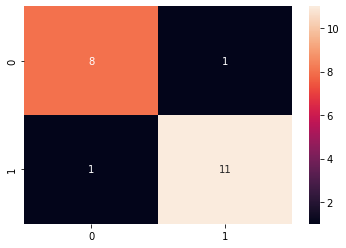

In [ ]:
sns.heatmap(confusion_matrix(y_test,xtest_svm_pred), annot = True, fmt = "d")

In [ ]:
accuracy_score(y_test, xtest_svm_pred)
svm_test_accuracy = accuracy_score(y_test, xtest_svm_pred)*100
print("Accuracy of the model or test data is: " + str(round(svm_test_accuracy, 2)) + '%')

Accuracy of the model or test data is: 90.48%


Comparision between three models

In [ ]:
model_compare = pd.DataFrame({"Artificial Neural Network":ann_accuracy,
                              "Logistic Regression":ted_accuracy,
                              "Support Vector Machine":svm_test_accuracy,}, index = ["accuracy"])
model_compare

,Artificial Neural Network,Logistic Regression,Support Vector Machine
accuracy,85.714286,85.714286,90.47619
